# Stock Market Prediction using Machine Learning

#### Data Loading & EDA

##### Importing necessary libraries of ML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the Apple's Historical stock dataset

In [3]:
df=pd.read_csv(r"C:\Users\Nitin\OneDrive\ドキュメント\AAPL_daily_update.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400
...,...,...,...,...,...,...,...
249,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600
250,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200
251,2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600
252,2020-09-09,117.260002,119.139999,115.260002,117.320000,117.320000,176276400


##### Viewing the summary of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


##### Plotting the closing price to analyse trends

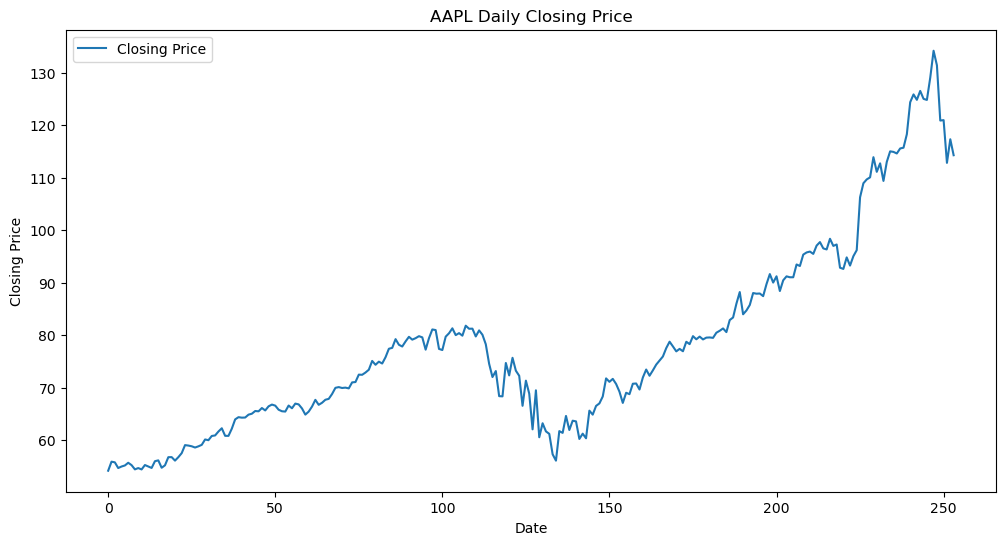

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Closing Price')
plt.title('AAPL Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

##### Checking for missing values to avoid deviations in accuracy

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##### Importing 'ta' Library

'ta' library provides a wide range of technical analysis indicators that are commonly used in stock market analysis and algorithmic trading.

In [7]:
import ta

#### Feature Engineering

Calculating 20-day simple moving average and Exponential moving avearge 

Simple moving avearge is calculated for the closing prices of last 20 days by finding the average in order eliminate short term fluctuations.

Exponential moving average is calculated for to highlight the recent change in trends.

In [8]:
df['SMA']=ta.trend.sma_indicator(df['Close'],window=20)
df['EMA']=ta.trend.ema_indicator(df['Close'],window=20)

Relative Strength Index is used here to measure the speed and change of price movements indicating overbought and oversold conditions.

In [9]:
df['RSI']=ta.momentum.rsi(df['Close'],window=20)

##### Extracting Date Features

extracting components from the date can help capture cyclical patterns.

In [10]:
df['Year']=df['Date'].str[:4]
df['Month']=df['Date'].str[5:7]
df['Day']=df['Date'].str[8:10]

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,Year,Month,Day
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600,NaN,NaN,NaN,2019,09,10
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400,NaN,NaN,NaN,2019,09,11
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800,NaN,NaN,NaN,2019,09,12
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200,NaN,NaN,NaN,2019,09,13
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400,NaN,NaN,NaN,2019,09,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600,120.359374,120.507164,58.696658,2020,09,03
250,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200,120.851749,120.550291,58.765665,2020,09,04
251,2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600,120.856374,119.814073,49.846163,2020,09,08
252,2020-09-09,117.260002,119.139999,115.260002,117.320000,117.320000,176276400,121.253624,119.576542,53.916471,2020,09,09


##### Target Creation
Creating the output feature 'Target' 

In [12]:
df['Target']=df['Close'].shift(-1)
df.dropna(inplace=True)

#### Train Test split 
Splitting the model in 80:20 ratio of train and test sets

In [13]:
x=df.drop(columns=['Target','Date'])
y=df['Target']
train_size=int(0.7*len(df))
x_train=x.iloc[:train_size]
x_test=x.iloc[train_size:]
y_train=y.iloc[:train_size]
y_test=y.iloc[train_size:]

#### Model Training

##### Applying LinearRegression model to predict the next day's closing prices

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)

In [52]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,Year,Month,Day,Target
19,2019-10-07,56.567501,57.482498,56.459999,56.764999,56.207317,122306000,55.284250,55.316706,62.070087,2019,10,7,56.099998
20,2019-10-08,56.455002,57.014999,56.082500,56.099998,55.548851,111820000,55.380500,55.391305,57.023185,2019,10,8,56.757500
21,2019-10-09,56.757500,56.947498,56.410000,56.757500,56.199894,74770400,55.423500,55.521419,60.376302,2019,10,9,57.522499
22,2019-10-10,56.982498,57.610001,56.825001,57.522499,56.957375,113013600,55.511000,55.711998,63.832315,2019,10,10,59.052502
23,2019-10-11,58.237499,59.410000,58.077499,59.052502,58.472343,166795600,55.729250,56.030141,69.443250,2019,10,11,58.967499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000,120.010499,120.467919,74.211384,2020,9,2,120.879997
249,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600,120.359374,120.507164,58.696658,2020,9,3,120.959999
250,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200,120.851749,120.550291,58.765665,2020,9,4,112.820000
251,2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600,120.856374,119.814073,49.846163,2020,9,8,117.320000


#### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
acc=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score: ",acc)

Mean Absolute Error: 2.3036092763733067
Mean Squared Error: 10.463209914558831
R2 Score:  0.9510344799907926


#### Visualisation

In [60]:
import matplotlib.pyplot as plt

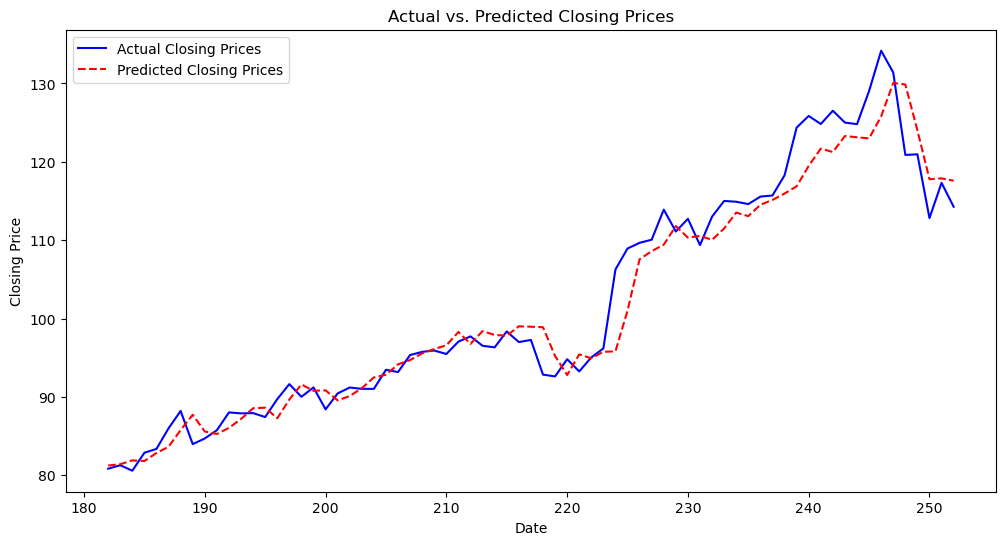

In [61]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Closing Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Closing Prices', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices")
plt.legend()
plt.show()

#### Conclusion

Mean Absolute Error (MAE): 2.30
On average, the predicted closing price deviates from the actual price by about $2.30.

Mean Squared Error (MSE): 10.46
This value confirms that the overall error magnitude is low, with larger errors being penalized more.

R² Score: 0.9510
Approximately 95% of the variance in the closing price is explained by our model, indicating an excellent fit.